# Data Visualization of Stroke Prediction Dataset 

The main question I want to ask regarding strokes is if comorbidities such as hypetension, heart disease, BMI, diabetes can predict the likelihood of stroke. 


In [3]:
import numpy as np
import pandas as pd
import seaborn as sb

print('Numpy:', np.__version__)
print('Pandas:', pd.__version__)
print('Seaborn:', sb.__version__)

df = pd.read_csv('stroke.csv')

df.head()


Numpy: 1.21.5
Pandas: 1.4.2
Seaborn: 0.11.2


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
print(df.dtypes)
print(df.info())

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9 

In [6]:
#What percent of people who had a stroke had underlying heart disease?
df_grouped = df.groupby(by='heart_disease')
for val,grp in df_grouped: 
    print(f'There were {len(grp)} people with {val} heart disease')
        


There were 4834 people with 0 heart disease
There were 276 people with 1 heart disease


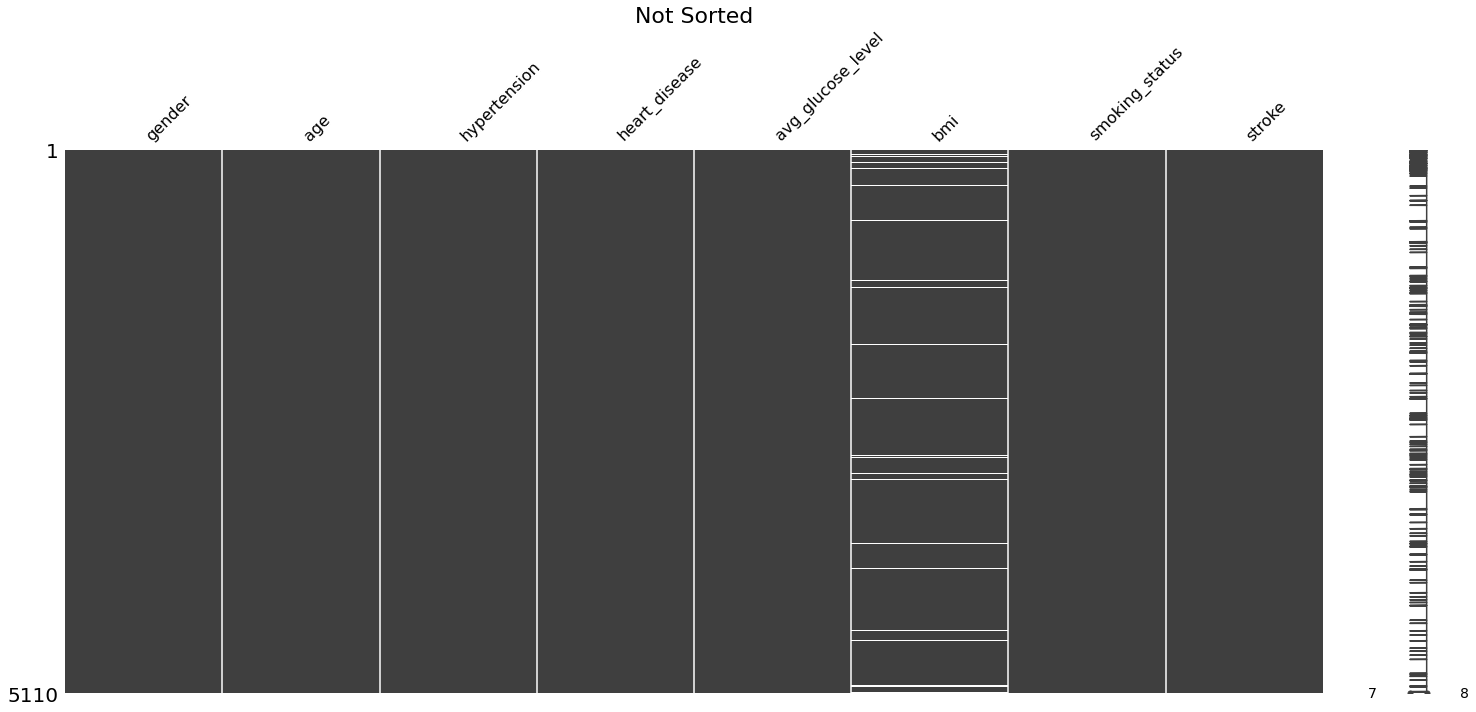

<Figure size 432x288 with 0 Axes>

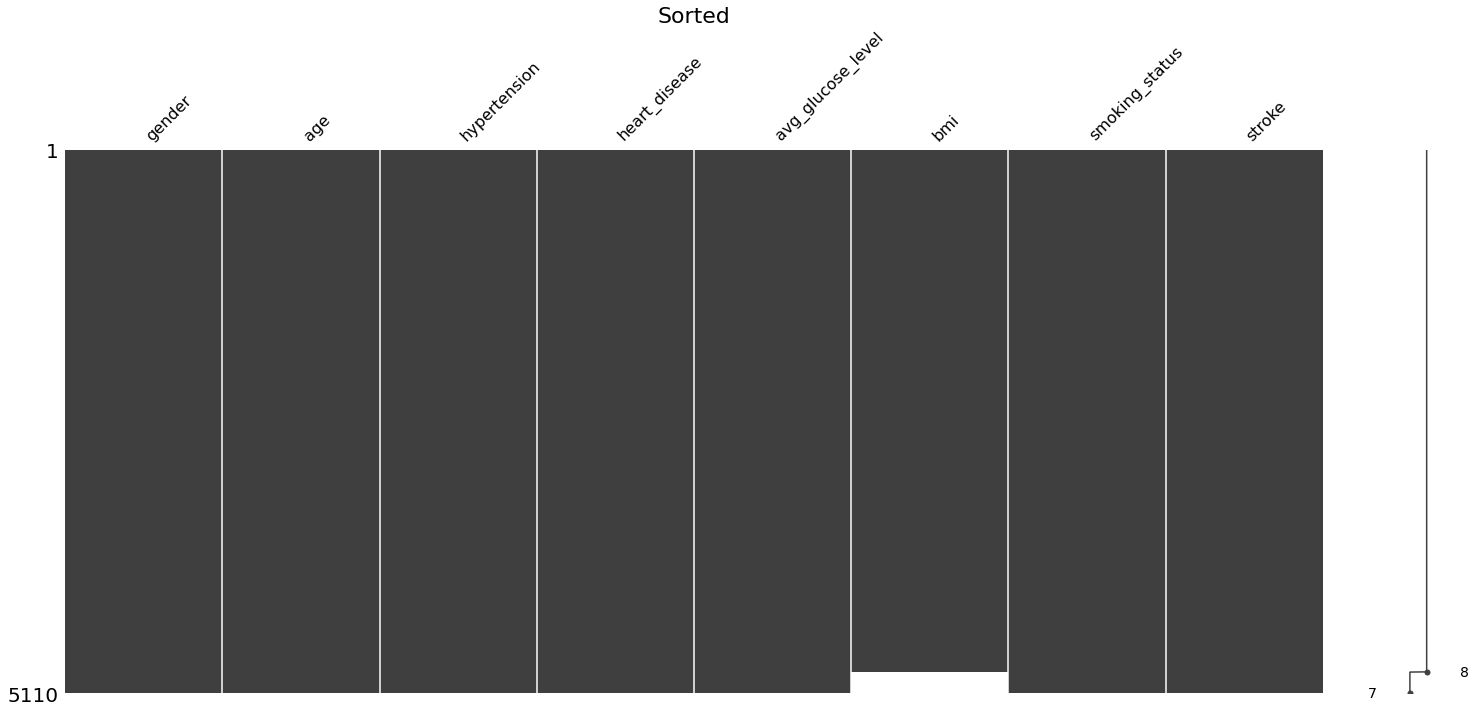

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter('ignore', )

import missingno as mn

mn.matrix(df)
plt.title("Not Sorted", fontsize=22)

plt.figure()
mn.matrix(df.sort_values(by=["bmi"]))
plt.title("Sorted", fontsize=22)
plt.show()

In [7]:
#Removing irrelevant attribute 

for col in ['id', 'ever_married', 'work_type', 'Residence_type']:
    if col in df:
        del df[col]
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                4909 non-null   float64
 6   smoking_status     5110 non-null   object 
 7   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 319.5+ KB


In [8]:
#impute missing BMI values using Split-Impute-Combine method

#bmi is suspected to by imputed according to their relation to heart disease, hypertension, glucose, and age 
df_grouped = df.groupby(by=['heart_disease', 'hypertension', 'avg_glucose_level', 'age'])
func = lambda grp: grp.fillna(grp.mean())
numeric_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
df_imputed_sic = df_grouped[numeric_columns].transform(func)

col_deleted = list( set(df.columns) - set(df_imputed_sic.columns))
df_imputed_sic[col_deleted] = df[col_deleted]

df_imputed_sic.dropna(inplace=True)

df_imputed_sic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4909 non-null   float64
 1   hypertension       4909 non-null   int64  
 2   heart_disease      4909 non-null   int64  
 3   avg_glucose_level  4909 non-null   float64
 4   bmi                4909 non-null   float64
 5   stroke             4909 non-null   int64  
 6   gender             4909 non-null   object 
 7   smoking_status     4909 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 345.2+ KB


In [10]:
from sklearn.impute import KNNImputer 
import copy 

knn_obj = KNNImputer(n_neighbors=5)

features_to_use = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

temp = df[features_to_use].to_numpy()

knn_obj.fit(temp)
temp_imputed = knn_obj.transform(temp)

df_imputed = copy.deepcopy(df)
df_imputed[features_to_use] = temp_imputed
df_imputed.dropna(inplace=True)
df_imputed.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                5110 non-null   float64
 6   smoking_status     5110 non-null   object 
 7   stroke             5110 non-null   float64
dtypes: float64(6), object(2)
memory usage: 319.5+ KB


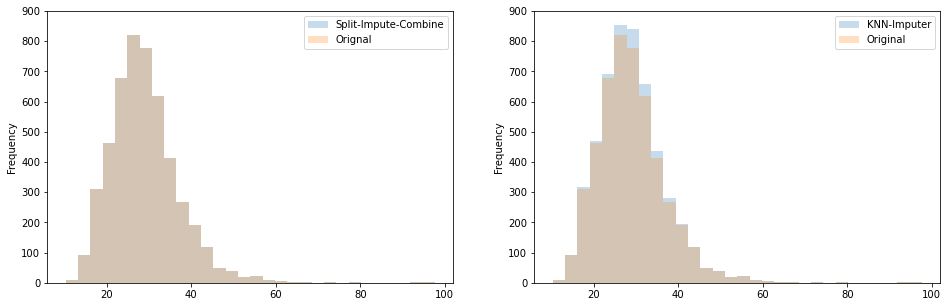

In [16]:
f = plt.figure(figsize=(16,5))

bin_num = 30
plt.subplot(1,2,1)
df_imputed_sic.bmi.plot(kind='hist', alpha=0.25, label="Split-Impute-Combine", bins=bin_num)

df.bmi.plot(kind='hist', alpha=0.25, label="Orignal", bins=bin_num)

plt.legend()
plt.ylim([0,900])

plt.subplot(1,2,2)
df_imputed.bmi.plot(kind='hist', alpha=0.25, label="KNN-Imputer", bins=bin_num)

df.bmi.plot(kind='hist', alpha=0.25, label="Original", bins=bin_num)

plt.legend()
plt.ylim([0,900])

plt.show()